# Data from Top200 SpotifyCharts


Proceso:
 - Sacar top200 de 2017, 2018, 2019 y 2010
 - De canciones duplicadas sumar los Streams y unir, quitar duplicados
 - Juntar Dataframes de años y añadir una nueva columna con el mismo.


## Preparación

In [88]:
# Help: https://github.com/kelvingakuo/fycharts#in
#! pip install fycharts


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date

#Fechas 2017
fecha_fin_2017 = '2017-05-13' # Empieza a levantarse restricciones de salida
fecha_inicial_2017 = '2017-03-14' #14 Marzo se decreta el estado de alarma, con 5753 casos y 136 fallecidos
fecha_fin2_2017 = datetime.strptime(fecha_fin_2017, '%Y-%m-%d')
fecha_inicial2_2017 = datetime.strptime(fecha_inicial_2017, '%Y-%m-%d')

#Fechas 2018
fecha_fin_2018 = '2018-05-13' # Empieza a levantarse restricciones de salida
fecha_inicial_2018 = '2018-03-14' #14 Marzo se decreta el estado de alarma, con 5753 casos y 136 fallecidos
fecha_fin2_2018 = datetime.strptime(fecha_fin_2018, '%Y-%m-%d')
fecha_inicial2_2018 = datetime.strptime(fecha_inicial_2018, '%Y-%m-%d')

#Fechas 2020
fecha_fin_2020 = '2020-05-13' # Empieza a levantarse restricciones de salida
fecha_inicial_2020 = '2020-03-14' #14 Marzo se decreta el estado de alarma, con 5753 casos y 136 fallecidos
fecha_fin2_2020 = datetime.strptime(fecha_fin_2020, '%Y-%m-%d')
fecha_inicial2_2020 = datetime.strptime(fecha_inicial_2020, '%Y-%m-%d')

#Fechas 2019
fecha_fin_2019 = '2019-05-13'
fecha_inicial_2019 = '2019-03-14'
fecha_fin2_2019 = datetime.strptime(fecha_fin_2019, '%Y-%m-%d')
fecha_inicial2_2019 = datetime.strptime(fecha_inicial_2019, '%Y-%m-%d')

print('Días totales seleccionados 2020:', fecha_fin2_2020 - fecha_inicial2_2020)
print('Días totales seleccionados 2019:', fecha_fin2_2019 - fecha_inicial2_2019)
print('Días totales seleccionados 2018:', fecha_fin2_2018 - fecha_inicial2_2018)
print('Días totales seleccionados 2017:', fecha_fin2_2017 - fecha_inicial2_2017)

Días totales seleccionados 2020: 60 days, 0:00:00
Días totales seleccionados 2019: 60 days, 0:00:00
Días totales seleccionados 2018: 60 days, 0:00:00
Días totales seleccionados 2017: 60 days, 0:00:00
Días totales seleccionados 2016: 60 days, 0:00:00


INFO : 19/08/2020 04:35:32 PM : Done appending to the table top_200_daily!!!


In [90]:
# Descarga de top200 para el periodo que nos interesa
# ¡IMPORTANTE! Ejecutar una única vez para descargar los datos, configurado para España, NO HACE FALTA EJECUTAR

'''

####### Descarga año 2020
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts_2020.db", echo=False)
api.top200Daily(output_file = "top_200_daily_2020.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial_2020, end = fecha_fin_2020, region = ["es"])


###### Descarga año 2019
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts_2019.db", echo=False)
api.top200Daily(output_file = "top_200_daily_2019.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial_2019, end = fecha_fin_2019, region = ["es"])
                          
####### Descarga año 2018
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts_2018.db", echo=False)
api.top200Daily(output_file = "top_200_daily_2018.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial_2018, end = fecha_fin_2018, region = ["es"])

####### Descarga año 2017
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts_2017.db", echo=False)
api.top200Daily(output_file = "top_200_daily_2017.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial_2017, end = fecha_fin_2017, region = ["es"])
                

'''

INFO : 19/08/2020 04:53:50 PM : Extracting top 200 daily for 2020-03-14 - es
INFO : 19/08/2020 04:53:51 PM : Extracting top 200 daily for 2020-03-15 - es
INFO : 19/08/2020 04:53:51 PM : POSTing data to the endpoint h
INFO : 19/08/2020 04:53:51 PM : Appending data to the table top_200_daily
Exception in thread Thread-31:
Traceback (most recent call last):
  File "/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/fycharts/SpotifyCharts.py", line 87, in __post_to_endpoint_from_queue
    INFO : 19/08/2020 04:53:51 PM : Appending data to the file top_200_daily_2020.csv...
postToRestEndpoint(df, url, what_data)
  File "/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/fycharts/write_to_outputs.py", line 54, in postToRestEndpoint
    raise(e)
  File "/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/fycharts/write_to_outputs.py", line 51, in postToRestEndpoint
INFO : 19/08/2020 04:53:51 PM : Done appending to the file top_200_daily_2020.csv!!!
    requests.post(url,

## Importar la tabla

In [ ]:
'''COLLAB: Para hacerlo funcionar en collab:
from google.colab import drive
drive.mount('/content/drive')'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Importamos la tabla con los datos y miramos a ver qué tal están
'''COLLAB:
data_top200_2020= pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2020.csv")
data_top200_2019= pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2019.csv")'''

data_top200_2020= pd.read_csv("top_200_daily_2020.csv")
data_top200_2019= pd.read_csv("top_200_daily_2019.csv")
data_top200_2018= pd.read_csv("top_200_daily_2018.csv")
data_top200_2017= pd.read_csv("top_200_daily_2017.csv")

print(data_top200_2020.isnull().sum())
print('2020:', data_top200_2020.shape)
print('2019:',data_top200_2019.shape)
print('2018:',data_top200_2018.shape)
print('2017:',data_top200_2017.shape)
data_top200_2017.head()

Position      0
Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
dtype: int64
2020: (12200, 7)
2019: (12200, 7)
2018: (12200, 7)
2017: (12200, 7)


,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,401425,2017-03-14,es,4aWmUDTfIPGksMNLV2rQP2
1,2,SUBEME LA RADIO (feat. Descemer Bueno & Zion &...,Enrique Iglesias,337665,2017-03-14,es,7nKBxz47S9SD79N086fuhn
2,3,Shape of You,Ed Sheeran,295039,2017-03-14,es,7qiZfU4dY1lWllzX7mPBI3
3,4,El Amante,Nicky Jam,208177,2017-03-14,es,3umS4y3uQDkqekNjVpiRUs
4,5,Reggaetón Lento (Bailemos),CNCO,177515,2017-03-14,es,3AEZUABDXNtecAOSC1qTfo


In [99]:
# Importamos con las columnas que nos interesan
'''COLLAB:
data_top200_2020 = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2020.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2019 = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2019.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])'''

data_top200_2020 = pd.read_csv("top_200_daily_2020.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2019 = pd.read_csv("top_200_daily_2019.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2018 = pd.read_csv("top_200_daily_2018.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2017 = pd.read_csv("top_200_daily_2017.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])

#Meto el año en nueva columnas columnas
data_top200_2020['year'] = pd.DatetimeIndex(data_top200_2020['date']).year
data_top200_2019['year'] = pd.DatetimeIndex(data_top200_2019['date']).year
data_top200_2018['year'] = pd.DatetimeIndex(data_top200_2018['date']).year
data_top200_2017['year'] = pd.DatetimeIndex(data_top200_2017['date']).year

#Concateno los datos de los dos años, REVISAR PARA TRES AÑOS!!!!!!!
data_top200 = pd.concat([data_top200_2020, data_top200_2019, data_top200_2018, data_top200_2017], axis=0,)

print(data_top200.dtypes)
print(data_top200.nunique()) # Ojo, debería haber el mismo número de Track Names y spotify ID!!
print(data_top200.shape)
print(data_top200.groupby(['year']).sum())
print(data_top200.groupby(['year']).count())

Position               int64
Track Name            object
Artist                object
Streams                int64
date          datetime64[ns]
spotify_id            object
year                   int64
dtype: object
Position        200
Track Name     1467
Artist          496
Streams       37700
date            244
spotify_id     1632
year              4
dtype: int64
(48800, 7)
      Position    Streams
year                     
2017   1226100  597569189
2018   1226100  699498013
2019   1226100  922066462
2020   1226100  990919605
      Position  Track Name  Artist  Streams   date  spotify_id
year                                                          
2017     12200       12200   12200    12200  12200       12200
2018     12200       12200   12200    12200  12200       12200
2019     12200       12200   12200    12200  12200       12200
2020     12200       12200   12200    12200  12200       12200


In [100]:
data_top200.loc[data_top200['spotify_id'] == '6NfrH0ANGmgBXyxgV2PeXt']

,Position,Track Name,Artist,Streams,date,spotify_id,year
1,2,La Difícil,Bad Bunny,399788,2020-03-14,6NfrH0ANGmgBXyxgV2PeXt,2020
201,2,La Difícil,Bad Bunny,372705,2020-03-15,6NfrH0ANGmgBXyxgV2PeXt,2020
401,2,La Difícil,Bad Bunny,389384,2020-03-16,6NfrH0ANGmgBXyxgV2PeXt,2020
601,2,La Difícil,Bad Bunny,390067,2020-03-17,6NfrH0ANGmgBXyxgV2PeXt,2020
801,2,La Difícil,Bad Bunny,392738,2020-03-18,6NfrH0ANGmgBXyxgV2PeXt,2020
...,...,...,...,...,...,...,...
11217,18,La Difícil,Bad Bunny,165292,2020-05-09,6NfrH0ANGmgBXyxgV2PeXt,2020
11426,27,La Difícil,Bad Bunny,151313,2020-05-10,6NfrH0ANGmgBXyxgV2PeXt,2020
11628,29,La Difícil,Bad Bunny,166240,2020-05-11,6NfrH0ANGmgBXyxgV2PeXt,2020
11828,29,La Difícil,Bad Bunny,143671,2020-05-12,6NfrH0ANGmgBXyxgV2PeXt,2020


In [101]:
# Agrupar sumas y convertir en Dataframe
data_top200_sumastreams = data_top200.groupby('spotify_id')['Streams'].sum()
data_top200_sumastreams = pd.DataFrame({'spotify_id':data_top200_sumastreams.index, 'Streams':data_top200_sumastreams.values})
print(data_top200_sumastreams.shape)
data_top200_sumastreams.head()

(1632, 2)


,spotify_id,Streams
0,000xQL6tZNLJzIrtIgxqSl,1229595
1,00ZBADBKZGwnzGIAA6U9Fb,44107
2,00lNx0OcTJrS3MKHcB80HY,3376922
3,00wxIcA1PPbqEzATkHT4e1,21853
4,017PF4Q3l4DBUiWoXk4OWT,2814658


Tengo 24400 filas en canciones, de las cuales hay 738 canciones únicas (Dataframe 1, si hago un groupby para que me sume los Streams de las mismas canciones se hace sin problema y tengo un Dataframe 2

Pero ahora no quiero perder las demás columnas haciendo groupby, pero es la forma fácil de hacer las sumas de Streams. Pero entonces quisiera añadir en nueva columna en el dataframe 1 el dato de Streams totales de dicha canción. Lo ideal sería hacer un bucle que mirara si el Track name es el mismo, entonces en una nueva columna añadiría ese dato para esa fila.

SOLUCIONADO CON UN MERGE!!!

In [102]:
#Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged = pd.merge(data_top200, data_top200_sumastreams, on=['spotify_id'], how='inner')

data_top200_merged.rename(columns = {'Streams_x':'Streams', 'Streams_y':'Streamstotal'},  inplace = True)
print(data_top200_merged.shape)
data_top200_merged

# Comprobaciones
# data_top200_sumastreams[data_top200_sumastreams['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']
# data_top200[data_top200['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']

(48800, 8)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal
0,1,Tusa,KAROL G,446086,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
1,1,Tusa,KAROL G,438199,2020-03-15,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
2,1,Tusa,KAROL G,474411,2020-03-16,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
3,1,Tusa,KAROL G,495344,2020-03-17,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
4,1,Tusa,KAROL G,489980,2020-03-18,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
...,...,...,...,...,...,...,...,...
48795,151,Occidentali's Karma - Radio Edit,Francesco Gabbani,21853,2017-05-13,00wxIcA1PPbqEzATkHT4e1,2017,21853
48796,169,I Can´t Go On,Robin Bengtsson,19253,2017-05-13,57Y51hxqMn2j3dosW75R6n,2017,19253
48797,178,Don't Come Easy,Isaiah Firebrace,18663,2017-05-13,2xI4CmkT6Bl4s5b4qggcgU,2017,18663
48798,181,Beautiful Mess,Kristian Kostov,18452,2017-05-13,5YCqzqb6yN6TsMOHb4FSVw,2017,18452


In [105]:
#Sacar lista de CANCIONES TOTALES (con repetición) para luego sacar las Features
list_ids = data_top200_merged['spotify_id'].tolist()
print('id de ejemplo', list_ids[0])
print('Canciones totales:', len(list_ids))

# Quitar duplicados, QUEDARNOS CON CANCIONES ÚNICAS
list_ids = list(set(list_ids))
print('Canciones totales únicas:' ,len(list_ids))

# Cojo un muestra de test más pequeña, seleccionar 
test_list = list_ids[0:2000]
len(test_list)


id de ejemplo 7k4t7uLgtOxPwTpFmtJNTY
Canciones totales: 48800
Canciones totales únicas: 1632


1632

In [106]:
#Sacar lista de ARTISTAS TOTALES
list_artist = data_top200_merged['Artist'].tolist()
print('nombre de ejemplo:', list_artist[0])
print('Artistas totales:', len(list_artist))

# Quitar duplicados, QUEDARNOS CON ARTISTAS ÚNICOS
list_artist = list(set(list_artist))
print('Artistas totales únicos:' ,len(list_artist))

# Cojo un muestra de test más pequeña
test_list_artist = list_artist[0:600]
len(test_list_artist)



nombre de ejemplo: KAROL G
Artistas totales: 48800
Artistas totales únicos: 496


496

# Data from API SPOTIFY



Proceso:

- Investigar cómo sacar features en serie con ID de canciones con API de Spotify
- Descargar features de las listas de top200
- Juntar Dataframes de features con el de top200 

In [9]:
# Instalaciones previas
# !pip install spotipy

In [107]:
#Preparación de Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

'''COLLAB:
passw = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/pass_spotify.txt", sep = ',', encoding="utf-8")'''
passw = pd.read_csv("pass_spotify.txt", sep = ',', encoding="utf-8")
client_id = passw.columns[0]
client_secret = passw.columns[1]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [108]:
'''#Ver las features que hay de Artists
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])
'''

#Ver las features que hay de Tracks, para probar
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])

[{'danceability': 0.669,
  'energy': 0.829,
  'key': 1,
  'loudness': -3.801,
  'mode': 1,
  'speechiness': 0.49,
  'acousticness': 0.179,
  'instrumentalness': 0,
  'liveness': 0.241,
  'valence': 0.61,
  'tempo': 118.934,
  'type': 'audio_features',
  'id': '2eOuL8KesslTLQERQPu11D',
  'uri': 'spotify:track:2eOuL8KesslTLQERQPu11D',
  'track_href': 'https://api.spotify.com/v1/tracks/2eOuL8KesslTLQERQPu11D',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2eOuL8KesslTLQERQPu11D',
  'duration_ms': 253067,
  'time_signature': 4}]

In [109]:
# Función para sacar las features de canciones que me interesan desde la id
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  valence = features[0]['valence']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  id = features[0]['id']

  track = [name, album, artist, release_date, length, popularity,
           acousticness, danceability, energy, instrumentalness,
           liveness, loudness, speechiness, valence, tempo, time_signature, id]
  return track

In [14]:
'''# Loop para sacar features de todas las canciones de una lista
# OJO, tarda bastante dependendo del número de canciones, por lo que antes hago un testeo
import time
list_toextract = test_list

tracks = []

Time1 = datetime.now()


for i in range(len(list_toextract)):
    time.sleep(.5)
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
    
Time2 = datetime.now()


Time1_v = datetime.now()

for i in range(len(list_toextract)):
    # time.sleep(.5)
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
    
Time2_v = datetime.now()

print("Tiempo 1:", Time2 -Time1)
print("Tiempo 2:", Time2_v -Time1_v)
'''

'# Loop para sacar features de todas las canciones de una lista\n# OJO, tarda bastante dependendo del número de canciones, por lo que antes hago un testeo\nimport time\nlist_toextract = test_list\n\ntracks = []\n\nTime1 = datetime.now()\n\n\nfor i in range(len(list_toextract)):\n    time.sleep(.5)\n    track = getTrackFeatures(list_toextract[i])\n    tracks.append(track)\n    \nTime2 = datetime.now()\n\n\nTime1_v = datetime.now()\n\nfor i in range(len(list_toextract)):\n    # time.sleep(.5)\n    track = getTrackFeatures(list_toextract[i])\n    tracks.append(track)\n    \nTime2_v = datetime.now()\n\nprint("Tiempo 1:", Time2 -Time1)\nprint("Tiempo 2:", Time2_v -Time1_v)\n'

In [110]:
# Ejecuto el script para sacar las features de las canciones (tarda bastante el proceso, dependiendo del número de canciones seleccionadas)
import time
list_toextract = test_list

tracks = []

Time1 = datetime.now()
for i in range(len(list_toextract)):
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)


Tiempo ejecución: 0:05:19.119830


In [111]:
# Meterlo en Dataframe
data_features = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date',
                                             'length', 'popularity','acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id'])

data_features_final = data_features [['album','release_date','length', 'popularity',
                                             'acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id']]

data_features_final = data_features_final.rename(columns = {'id':'spotify_id'})


In [112]:
data_features_final.shape

(1632, 15)

In [113]:
print(data_features_final.shape)
data_features_final.head(2)

(1632, 15)


,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id
0,Cuando el Río Suena...,2017-09-15,220000,55,0.359,0.746,0.732,0.000002,0.0904,-5.543,0.182,0.945,90.030,4,569wwTXGm6Ujk1HeJjH6fj
1,Para Aventuras y Curiosidades,2019-05-03,204563,75,0.118,0.719,0.753,0.000004,0.2120,-4.891,0.179,0.675,174.107,4,56f5qnyAlZdlz8wrUDA50h


# ¿Es necesario normalizar algunas features?

- Revisar las features y su distribución

In [114]:
# Hacemos un describe y se ve la desviación estandar dispar en algunas features
data_features_final.describe()


,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,210909.577819,51.148284,0.240671,0.697055,0.678977,0.008294,0.165137,-5.702390,0.108612,0.568780,121.985901,3.980392
std,39383.344468,29.290885,0.229330,0.124958,0.158959,0.059620,0.118317,2.441758,0.091853,0.219727,31.945011,0.203242
min,74231.000000,0.000000,0.000016,0.153000,0.043400,0.000000,0.021500,-31.042000,0.023200,0.049900,62.446000,1.000000
25%,187108.000000,37.750000,0.059650,0.626000,0.588000,0.000000,0.092875,-6.687250,0.047075,0.406750,95.973000,4.000000
50%,207731.000000,61.000000,0.166000,0.718000,0.709000,0.000000,0.120000,-5.317000,0.072050,0.585000,113.006000,4.000000
75%,228996.750000,73.000000,0.350250,0.786000,0.795000,0.000023,0.198000,-4.166750,0.135000,0.747250,143.962000,4.000000
max,464200.000000,100.000000,0.984000,0.968000,0.989000,0.915000,0.838000,-0.582000,0.714000,0.973000,212.117000,5.000000


''

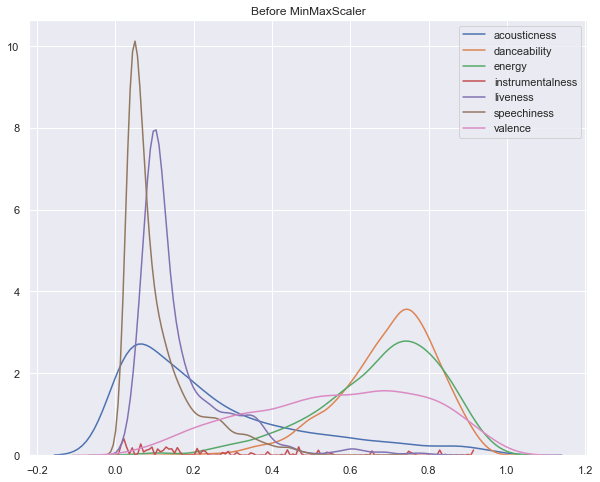

In [115]:
# Parece que length, popularity, loudness y tempo habría que normalizar entre 0 y 1, como el resto.
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Before MinMaxScaler')

# sns.kdeplot(data_final_selected['length'], ax=ax1)
# sns.kdeplot(data_final_selected['popularity'], ax=ax1)
sns.kdeplot(data_features_final['acousticness'], ax=ax1)
sns.kdeplot(data_features_final['danceability'], ax=ax1)
sns.kdeplot(data_features_final['energy'], ax=ax1)
sns.kdeplot(data_features_final['instrumentalness'], ax=ax1)
sns.kdeplot(data_features_final['liveness'], ax=ax1)
# sns.kdeplot(data_final_selected['loudness'], ax=ax1)
sns.kdeplot(data_features_final['speechiness'], ax=ax1)
sns.kdeplot(data_features_final['valence'], ax=ax1)
# sns.kdeplot(data_final_selected['tempo'], ax=ax1)
;

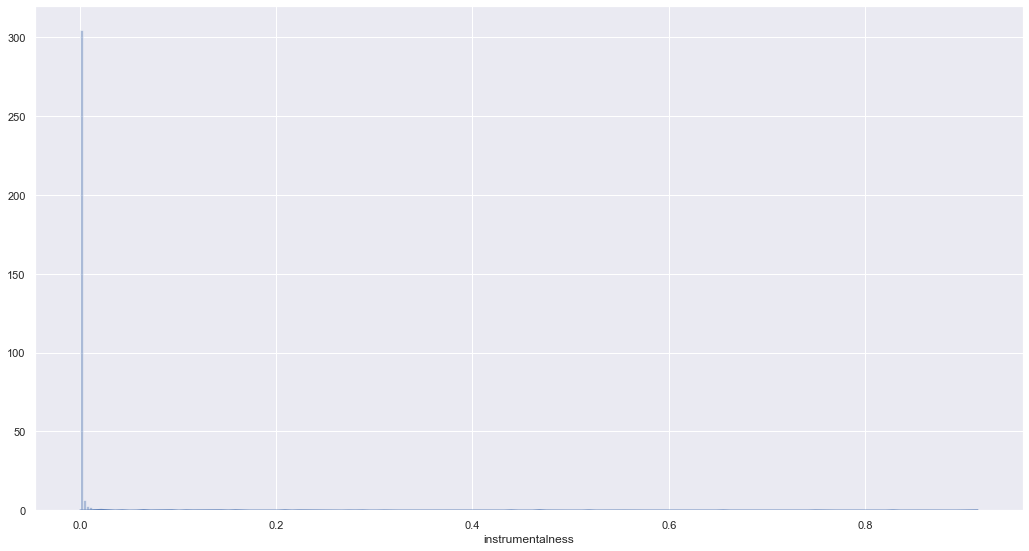

album               8
release_date        8
length              8
popularity          8
acousticness        8
danceability        8
energy              8
instrumentalness    8
liveness            8
loudness            8
speechiness         8
valence             8
tempo               8
time_signature      8
spotify_id          8
dtype: int64
album               919
release_date        919
length              919
popularity          919
acousticness        919
danceability        919
energy              919
instrumentalness    919
liveness            919
loudness            919
speechiness         919
valence             919
tempo               919
time_signature      919
spotify_id          919
dtype: int64


In [116]:
# Reviso la feature instrumentalness, que es un poco rara

sns.set(rc={'figure.figsize':(17.7,9.27)})
sns.distplot(data_features_final['instrumentalness'], bins=300)
plt.show()

# Está bien, pero casi todos los valores están muy muy próximos a 0, siendo más de la mitad 0, así que lo dejamos así.
print(data_features_final[data_features_final['instrumentalness'] > 0.5].count())
print(data_features_final[data_features_final['instrumentalness'] == 0].count())

# Spotify define este feature como que si el valor está entre 0.5 y 1 es instrumental, por tanto, VALORAR si tranformar en variable dicotómica.


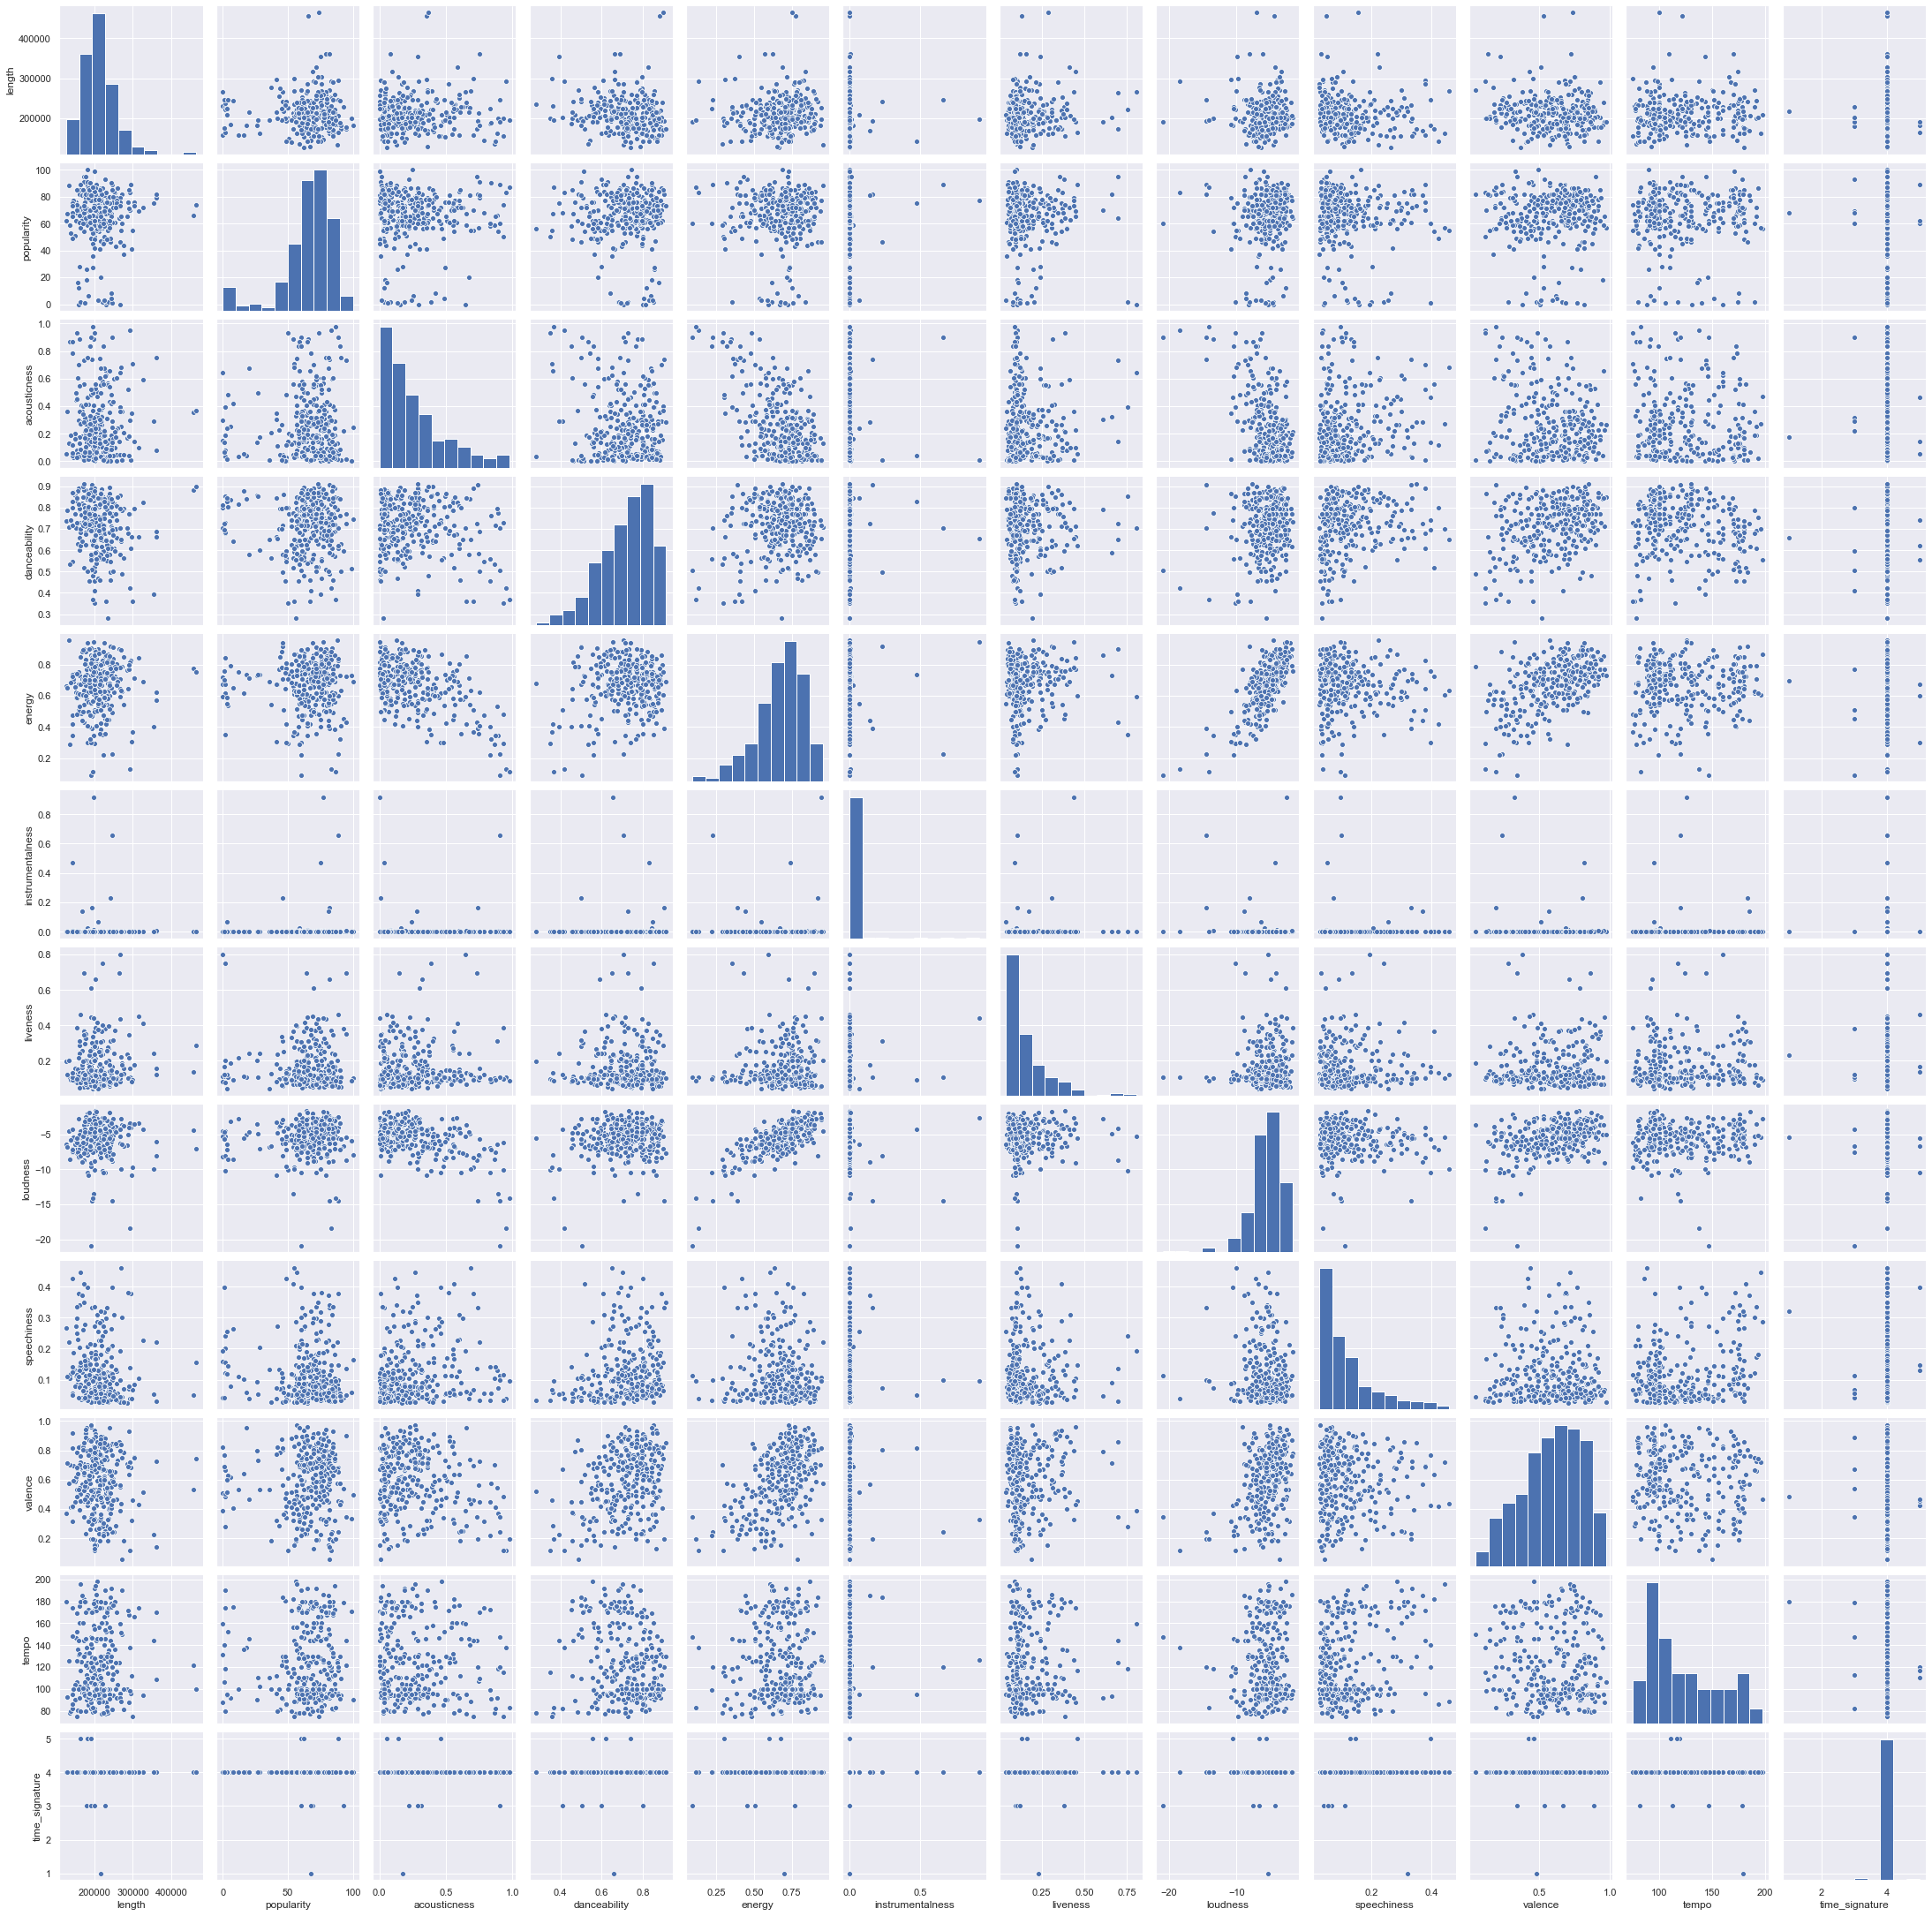

In [169]:
'''# Vamos a ver la distribución de todas las features (tarda en cargar)
sns.pairplot(data_features_final);'''

''

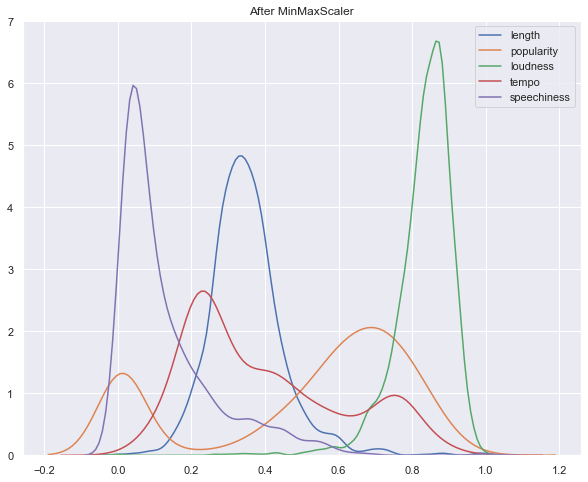

In [117]:
# Finalmente decido normalizar con máximos y mínimos dichas features

# Definir tabla con features seleccionadas y ver cómo quedan
features = data_features_final[['length', 'popularity','loudness','tempo','speechiness']]

import seaborn as sns
from sklearn import preprocessing
# Cogemos la lista de features
col_names = list(features.columns)

maxmin_scaler = preprocessing.MinMaxScaler()
features_maxmin = maxmin_scaler.fit_transform(features)

features_maxmin_final = pd.DataFrame(features_maxmin, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(features_maxmin_final['length'], ax=ax1)
sns.kdeplot(features_maxmin_final['popularity'], ax=ax1)
sns.kdeplot(features_maxmin_final['loudness'], ax=ax1)
sns.kdeplot(features_maxmin_final['tempo'], ax=ax1)
sns.kdeplot(data_final_selected['speechiness'], ax=ax1)

'''sns.kdeplot(features['danceability'], ax=ax1)
sns.kdeplot(features['valence'], ax=ax1)'''
;

In [118]:
# Para modificar sobre dataframe sólo determinadas columnas se puede hacer de otra forma:
features_to_normalize = ['length', 'popularity', 'loudness', 'tempo', 'speechiness']

data_features_final[features_to_normalize] = data_features_final[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
data_features_final.head(2)

,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id
0,Cuando el Río Suena...,2017-09-15,0.373796,0.55,0.359,0.746,0.732,0.000002,0.0904,0.837131,0.229878,0.945,0.184298,4,569wwTXGm6Ujk1HeJjH6fj
1,Para Aventuras y Curiosidades,2019-05-03,0.334211,0.75,0.118,0.719,0.753,0.000004,0.2120,0.858536,0.225536,0.675,0.746043,4,56f5qnyAlZdlz8wrUDA50h


# Unir Dataframes en uno

In [123]:
data_features = pd.merge(data_top200_merged, data_features_final, on=['spotify_id'], how='inner')
print(data_features.shape)


###### Exportar a CSV
# data_features.to_csv("data_features.csv", sep = ',')



(48800, 22)


In [120]:
print(data_features.shape)
data_features.sample(3)

(48800, 22)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,...,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
28451,79,El Patio,Pablo López,44132,2018-05-10,3YWh4qEPAkWYu2830DFcga,2018,2879865,"Camino, Fuego Y Libertad",2017-12-15,...,0.164,0.461,0.495,0.000005,0.124,0.781221,0.008396,0.128,0.505101,4
35446,14,La Rompe Corazones,Daddy Yankee,147606,2017-05-05,4okba5wu9mMLXx79DXLKi3,2017,9483812,La Rompe Corazones,2017-01-13,...,0.116,0.685,0.859,0.000000,0.317,0.933913,0.046468,0.891,0.758811,4
18103,120,Te esperaré toda la vida,Dani Fernández,45815,2019-03-30,6MCPhEshiLRXgdFKqvr478,2019,2787303,En llamas,2018-11-23,...,0.220,0.750,0.630,0.000000,0.132,0.847636,0.025622,0.850,0.438174,4


In [121]:
# ¿Cuántos artistas únicos hay realmente?
artist_unique = data_features.groupby('Artist')['spotify_id'].nunique()
print(artist_unique.shape)
artist_unique.sort_values(ascending=False).head(20)

(496,)


Artist
Bad Bunny          44
J Balvin           31
Ozuna              28
C. Tangana         25
Ed Sheeran         22
Dua Lipa           21
Aitana             20
Beret              20
The Weeknd         20
Drake              19
Leiva              19
Billie Eilish      19
Sebastian Yatra    19
Rels B             17
Avicii             17
Morat              16
Maluma             15
KAROL G            14
Alejandro Sanz     13
Post Malone        13
Name: spotify_id, dtype: int64

# Extracción del género canciones

Proceso:
 - Investigar sobre donde sacar la info de géneros
 - Encontrar dataset con género de canciones
 - Crear varios algoritmos de clasificación y probar (random forest? SVM?)
 - Clasificar todas las canciones y añadir columna al dataset final.



Podría hacer un algoritmo de clasificación por géneros pero se descarta porque su accuracy es muy bajo según he visto en otros análisis.

Most listened genres: Pop, Rock, Oldies, Hip-hop/Rap, Dance/Electronic, Indie/Alternative, K-Pop, Metal, R&B, Classical
https://celebrityaccess.com/2019/10/05/pop-is-still-the-1-music-genre-worldwide/


Most popular genres:
1	☊	pop
2	☊	dance pop
3	☊	rap
4	☊	pop rap
5	☊	rock
6	☊	post-teen pop
7	☊	latin
8	☊	hip hop
9	☊	trap
10	☊	edm
11	☊	modern rock
12	☊	tropical house
13	☊	pop rock
14	☊	melodic rap
15	☊	reggaeton
16	☊	latin pop
17	☊	classic rock
18	☊	electropop
19	☊	mellow gold
20	☊	album rock
http://everynoise.com/everynoise1d.cgi?vector=popularity&scope=all

## Cómo extraer los genres de spotify directamente

- La feature genres en Spotify no está por canción sino por los artistas, entonces debemos sacarlo de artistas
- Sacar el id de artista a través de su Nombre que sacamos del dataframe general
- Con su id de artista sacar los genres de dicho artista.
- Unir con el dataframe grande.

In [ ]:
'''PROBANDO QUE FUNCIONAN ALGUNAS COSAS 
#Sí que funciona la función Append
data1 = ['4QQgXkCYTt3BlENzhyNETg', 'The Weekend', 'disco', 2453877, 75]
df_xxx = pd.DataFrame([data1], columns=["id", "name", "genres", 'followers', 'popularity'])

data2 = ['xxxx', 'sdfs', 'sdfsdf', 2453877, 75]
df_yyy = pd.DataFrame([data2], columns=["id", "name", "genres", 'followers', 'popularity'])

df_xxx.append(df_yyy)

#Y también funciona la creación del dataframe
search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT, offset=API_LIMIT*i)
search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']] for t in search_results['artists']['items']]
df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])

df_search
'''

'''#INFO lo próximo que probar!!!!! https://stackoverflow.com/questions/61624487/extract-artist-genre-and-song-release-date-using-spotipy

result = sp.search("AJR")
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
print("artist genres:", artist["genres"])

album = sp.album(track["album"]["external_urls"]["spotify"])
print("album genres:", album["genres"])
print("album release-date:", album["release_date"])

# https://stackoverflow.com/questions/31674557/how-to-append-rows-in-a-pandas-dataframe-in-a-for-loop
'''


'''
# Para qué info nos da de artista:
artist = 'Earth, Wind & Fire'

search_results = sp.search(q = 'artist:' + 'Earth, Wind & Fire', type="artist")
items = search_results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])


# search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"], t["album"]["name"], t["popularity"]] for t in search_results['tracks']['items']]
# search_list


#results = spotify.search(q='artist:' + name, type='artist')
search_results


'''

'\n# Para qué info nos da de artista:\nartist = \'Earth, Wind & Fire\'\n\nsearch_results = sp.search(q = \'artist:\' + \'Earth, Wind & Fire\', type="artist")\nitems = search_results[\'artists\'][\'items\']\nif len(items) > 0:\n    artist = items[0]\n    print(artist[\'name\'], artist[\'images\'][0][\'url\'])\n\n\n# search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"], t["album"]["name"], t["popularity"]] for t in search_results[\'tracks\'][\'items\']]\n# search_list\n\n\n#results = spotify.search(q=\'artist:\' + name, type=\'artist\')\nsearch_results\n\n\n'

In [122]:
# Extracción de géneros de API spotify y meterlos en dataframe
import time

#Seleccionar cuantos datos se van a sacar
list_toextract_artist = test_list_artist

# Función para extraerlos, en lotes de 50 porque es el máximo que te deja la API de Spotify
def extract_artist(artist_list):
    count_artist= 0
    data = ['test11111111', 'tes111111', 'test111111', 0, 0]
    df_final = pd.DataFrame([data], columns=["id", "name", "genres", 'followers', 'popularity'])
    
    API_LIMIT = 50
    search_list = []

    for artist in artist_list:
        count_artist += 1
        search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT)
        
        count_oneartist= 0 # Se añde un contador par quedarnos sólo con la primera búsqueda que he comprobado que siempre es la buena.
        for t in search_results['artists']['items']:
            count_oneartist += 1
            if count_oneartist ==2:
                break
            else:
                search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']]]
        
        df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
        
        df_final = df_final.append(df_search) # El problema de esto es que crea duplicados
    print('Artist count:', count_artist)  
    return df_final

Time1 = datetime.now()
df_genres = extract_artist(list_toextract_artist)
Time2 = datetime.now()
print("Tiempo ejecución:", Time2 -Time1)

print(df_genres.shape)
df_genres.head(6)


Artist count: 496
Tiempo ejecución: 0:00:46.611220
(122460, 5)


,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,3MHaV05u0io8fQbZ2XPtlC,Prince Royce,"[bachata, latin, latin hip hop, latin pop, reg...",5608913,80
0,3MHaV05u0io8fQbZ2XPtlC,Prince Royce,"[bachata, latin, latin hip hop, latin pop, reg...",5608913,80
1,5lFhCi03HDneWzvCxGctrT,Jory Boy,"[latin, latin hip hop, perreo, reggaeton, regg...",984734,67
0,3MHaV05u0io8fQbZ2XPtlC,Prince Royce,"[bachata, latin, latin hip hop, latin pop, reg...",5608913,80
1,5lFhCi03HDneWzvCxGctrT,Jory Boy,"[latin, latin hip hop, perreo, reggaeton, regg...",984734,67


In [124]:
# Como la columna genres es una lista con los diferentes géneros, tenemos que separarlo en columnas y no perder las que nos interesan
# Tarda en ejecutarse dependiendo del número de artistas
df_genres2 = pd.concat([df_genres['genres'].apply(pd.Series), df_genres[['id',
                                                                         "name",
                                                                         'followers',
                                                                         'popularity']]], axis = 1)

# Finalmente quitamos los duplicados 
df_genres3 = df_genres2.drop_duplicates(df_genres2.columns[~df_genres2.columns.isin(['id'])])
df_genres4 = df_genres3.rename(columns={0:'genre1',
                   1:'genre2',
                   2:'genre3',
                   3:'genre4',
                   4:'genre5',
                   5:'genre6',
                   6:'genre7',
                   7:'genre8',
                   8:'genre9',
                   9:'genre10',
                   'id':'artist_id',
                   'name':'Artist',
                   'followers':'artist_followers',
                   'popularity':'artist_popularity'}).copy()
print(df_genres4.shape)
print(len(df_genres4['Artist'].unique()))
df_genres4.head(10)


(490, 14)
490


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test11111111,tes111111,0,0
0,bachata,latin,latin hip hop,latin pop,reggaeton,tropical,NaN,NaN,NaN,NaN,3MHaV05u0io8fQbZ2XPtlC,Prince Royce,5608913,80
1,latin,latin hip hop,perreo,reggaeton,reggaeton flow,trap latino,tropical,NaN,NaN,NaN,5lFhCi03HDneWzvCxGctrT,Jory Boy,984734,67
2,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4Wcscw7z9AAE6y7qWdIAin,Dylan Fuentes,31397,59
3,argentine hip hop,trap argentino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4m6ubhNsdwF4psNf3R8kwR,KHEA,2049661,78
4,dance pop,electropop,pop,post-teen pop,uk pop,NaN,NaN,NaN,NaN,NaN,5ZsFI1h6hIdQRw2ti0hz81,ZAYN,12526578,82
5,melodic rap,philly rap,rap,trap,NaN,NaN,NaN,NaN,NaN,NaN,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,9461109,92
6,latin pop,latin talent show,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,3MRynBsyLGzv3IQ9Fip6hO,Ana Guerra,358495,60
7,dance pop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,49259978,93
8,latin arena pop,spanish pop,spanish rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4cA5JN7tiNZ8afYeuSQj5h,David Otero,115212,62


In [125]:
# Probamos que está bien
df_genres4[df_genres4['Artist'] == 'Bad Bunny']

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,Artist,artist_followers,artist_popularity
461,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4q3ewBCX7sLwd24euuV69X,Bad Bunny,23836096,97


In [126]:
#Vemos cuántos géneros hay en cada columna
number_genres = df_genres4.genre1.value_counts()
number_genres.head(60)

latin                        68
dance pop                    62
cantautor                    17
colombian pop                15
eurovision                   14
pop                          13
spanish pop                  13
rap espanol                  11
latin pop                    11
dominican pop                 9
flamenco urbano               9
big room                      8
latin arena pop               8
trap espanol                  8
latin viral pop               8
argentine hip hop             6
cubaton                       5
dembow                        5
latin talent show             5
bachata                       4
electro latino                4
r&b en espanol                4
art pop                       4
reggaeton flow                4
melodic rap                   4
atl hip hop                   4
canadian contemporary r&b     3
emo rap                       3
boy band                      3
pop rap                       3
panamanian pop                3
hip hop 

In [127]:
df_genres4[df_genres4['genre3'] == 'spanish pop']


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,Artist,artist_followers,artist_popularity
16,latin,latin pop,spanish pop,tropical,NaN,NaN,NaN,NaN,NaN,NaN,3smfreCkyJt7bShaTYpG77,Carlos Baute,1250459,67
168,latin pop,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3IJtdFn9IKbFvNvZqOJA46,Blas Cantó,164796,58
185,cantautor,spanish new wave,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1OTnb625gMBm5NsLYAdUEm,Los Ronaldos,68518,53
257,latin talent show,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0CQgFG7XHyXRpSi24kl0cx,Alfred García,120102,52
259,latin talent show,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3E3qsTzCvTX13A1Zrw7Wnf,Miriam Rodríguez,178400,49
270,flamenco urbano,spanish hip hop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2dkbKcHXhN7ooFBdqAV76G,Nyno Vargas,160556,63
301,latin arena pop,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,5kSJMVPcTITrSZxTrHllVN,Vanesa Martín,602154,68
314,latin,latin pop,spanish pop,spanish pop rock,NaN,NaN,NaN,NaN,NaN,NaN,23cijmutocNvhM5xkcyyFF,Beatriz Luengo,144549,57
323,carnaval cadiz,latin pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7qAoXV4U0qDxQAUqhszjAA,Manuel Carrasco,1427037,69
330,flamenco urbano,pop flamenco,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5QYdUMRHeBxlpJioqpIL0k,Sergio Contreras,181962,60


In [140]:
# Decido normalizar también el artist popularity
features_to_normalize2 = ['artist_popularity']

df_genres4[features_to_normalize2] = df_genres4[features_to_normalize2].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
print(df_genres4.shape)
df_genres4.head(4)


(490, 14)


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test11111111,tes111111,0,0.000000
0,bachata,latin,latin hip hop,latin pop,reggaeton,tropical,NaN,NaN,NaN,NaN,3MHaV05u0io8fQbZ2XPtlC,Prince Royce,5608913,0.816327
1,latin,latin hip hop,perreo,reggaeton,reggaeton flow,trap latino,tropical,NaN,NaN,NaN,5lFhCi03HDneWzvCxGctrT,Jory Boy,984734,0.683673
2,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4Wcscw7z9AAE6y7qWdIAin,Dylan Fuentes,31397,0.602041


# Unimos con dataframe anterior el dataframe de genres

In [141]:
data_glo = pd.merge(data_features, df_genres4, on=['Artist'], how='inner')
print(data_glo.shape)
data_glo.head(5)

###### Exportar a CSV
# data_glo.to_csv("data_global.csv", sep = ',')

(48059, 35)


In [142]:
data_glo.head(4)

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,artist_id,artist_followers,artist_popularity
0,1,Tusa,KAROL G,446086,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,0.887755
1,1,Tusa,KAROL G,438199,2020-03-15,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,0.887755
2,1,Tusa,KAROL G,474411,2020-03-16,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,0.887755
3,1,Tusa,KAROL G,495344,2020-03-17,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892,Tusa,2019-11-07,...,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,790FomKkXshlbRYZFtlgla,11322371,0.887755


In [145]:
#Para ver si existen variables con corelación entre ellas.
corr_metrics = data_glo.corr()
corr_metrics.style.background_gradient()

,Position,Streams,year,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity
Position,1.000000,-0.739458,0.001762,-0.583804,-0.023282,-0.024884,0.060825,-0.161065,-0.095920,0.059939,0.007513,-0.145878,0.005564,-0.125454,0.043236,-0.028931,-0.057838,-0.170145
Streams,-0.739458,1.000000,0.205275,0.738123,-0.012191,0.117258,-0.010019,0.161096,0.062099,-0.035301,-0.014501,0.123836,0.057126,0.142910,-0.023161,0.045152,0.011715,0.143159
year,0.001762,0.205275,1.000000,0.184790,-0.143147,0.489094,0.083616,0.115653,-0.060300,0.069978,-0.019749,0.038775,0.087155,0.059337,0.059062,0.018021,-0.154395,0.009596
Streamstotal,-0.583804,0.738123,0.184790,1.000000,0.026931,0.144135,0.008874,0.170392,0.099167,-0.045088,-0.029757,0.163411,0.020349,0.155571,-0.067464,0.031946,0.063957,0.132058
length,-0.023282,-0.012191,-0.143147,0.026931,1.000000,-0.026537,0.016562,-0.069353,0.029978,-0.042694,-0.022121,0.030737,-0.009907,-0.066560,0.031252,-0.024806,0.057004,0.038549
popularity,-0.024884,0.117258,0.489094,0.144135,-0.026537,1.000000,0.044845,0.083928,-0.073721,0.047645,-0.067977,0.023128,0.021234,-0.004728,-0.025427,0.002076,0.072768,0.125189
acousticness,0.060825,-0.010019,0.083616,0.008874,0.016562,0.044845,1.000000,-0.130003,-0.488923,0.007370,-0.070545,-0.355471,0.104738,-0.164301,-0.013185,-0.117653,0.059572,0.022065
danceability,-0.161065,0.161096,0.115653,0.170392,-0.069353,0.083928,-0.130003,1.000000,0.091612,0.009808,0.004536,0.147847,0.102650,0.356155,-0.205435,0.124269,-0.002939,0.060512
energy,-0.095920,0.062099,-0.060300,0.099167,0.029978,-0.073721,-0.488923,0.091612,1.000000,-0.011441,0.092888,0.729550,-0.072011,0.432776,0.016313,0.152870,-0.199457,-0.134876
instrumentalness,0.059939,-0.035301,0.069978,-0.045088,-0.042694,0.047645,0.007370,0.009808,-0.011441,1.000000,0.036890,-0.082291,0.014618,-0.063535,0.024352,-0.014490,0.049182,0.023301


In [146]:
data_glo.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'date', 'spotify_id',
       'year', 'Streamstotal', 'album', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
       'time_signature', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5',
       'genre6', 'genre7', 'genre8', 'genre9', 'genre10', 'artist_id',
       'artist_followers', 'artist_popularity'],
      dtype='object')

# Primer vistazo: comparar FEATURES de año 2018, 2019 y 2020

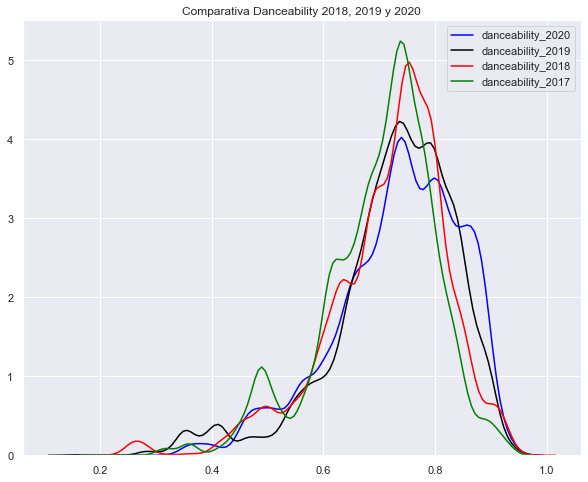

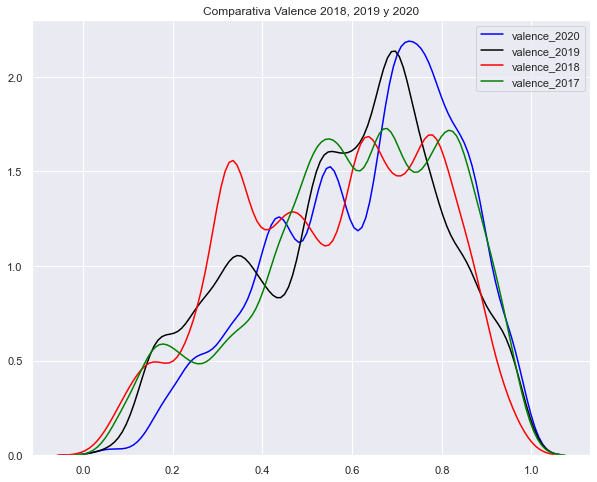

In [147]:
# Ploteamos en gráfico para ver la cantidad de canciones con los valores de determinadas features

data_glo_2020 = data_glo[data_glo['year'] == 2020]
data_glo_2019 = data_glo[data_glo['year'] == 2019]
data_glo_2018 = data_glo[data_glo['year'] == 2018]
data_glo_2017 = data_glo[data_glo['year'] == 2017]

feature_list = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features_2020 = data_glo_2020[feature_list]
features_2019 = data_glo_2019[feature_list]
features_2018 = data_glo_2018[feature_list]
features_2017 = data_glo_2017[feature_list]


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Danceability 2018, 2019 y 2020')
sns.kdeplot(features_2020['danceability'], ax=ax1, color = 'blue', Label='danceability_2020')
sns.kdeplot(features_2019['danceability'], ax=ax1, color = 'black', Label='danceability_2019')
sns.kdeplot(features_2018['danceability'], ax=ax1, color = 'red', Label='danceability_2018')
sns.kdeplot(features_2017['danceability'], ax=ax1, color = 'green', Label='danceability_2017')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Valence 2018, 2019 y 2020')
sns.kdeplot(features_2020['valence'], ax=ax1, color = 'blue', Label='valence_2020')
sns.kdeplot(features_2019['valence'], ax=ax1, color = 'black', Label='valence_2019')
sns.kdeplot(features_2018['valence'], ax=ax1, color = 'red', Label='valence_2018')
sns.kdeplot(features_2017['valence'], ax=ax1, color = 'green', Label='valence_2017')

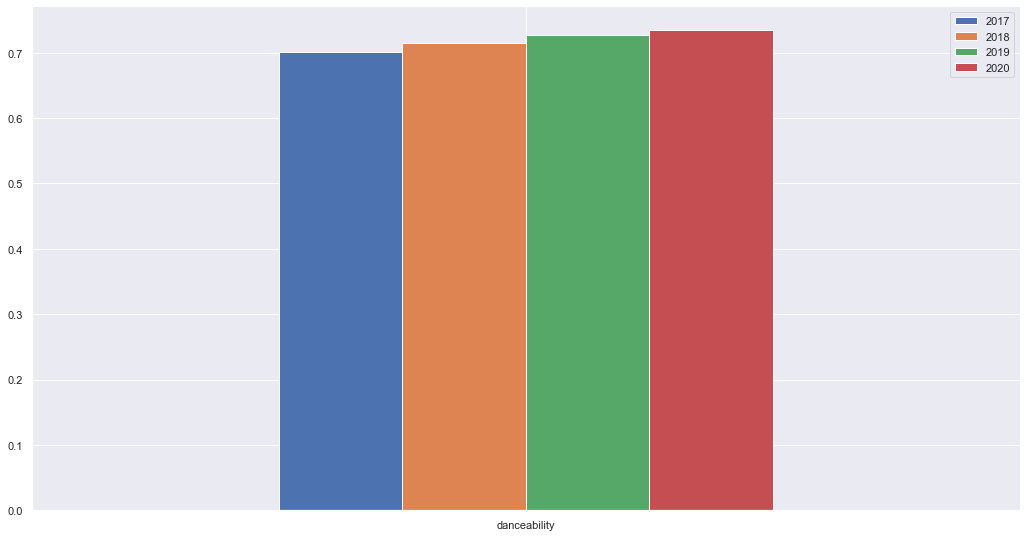

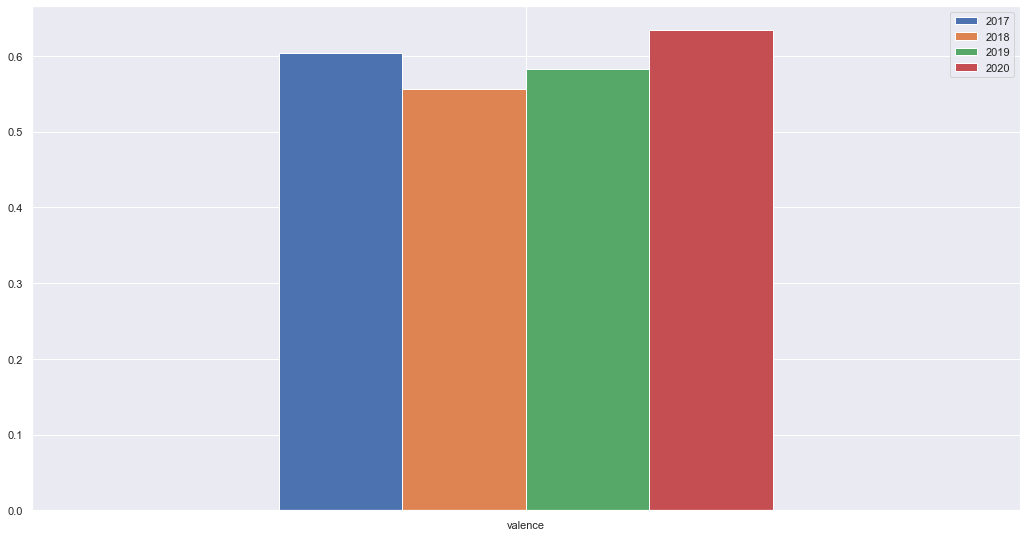

In [134]:
# Hacemos lo mismo pero viendo las medias (ojo! sin ponderar, eso lo hacemos en el análisis)

data_mean_dance_2020 = features_2020['danceability'].mean()
data_mean_dance_2019 = features_2019['danceability'].mean()
data_mean_dance_2018 = features_2018['danceability'].mean()
data_mean_dance_2017 = features_2017['danceability'].mean()
index_dance = ['danceability']

data_mean_valen_2020 = features_2020['valence'].mean()
data_mean_valen_2019 = features_2019['valence'].mean()
data_mean_valen_2018 = features_2018['valence'].mean()
data_mean_valen_2017 = features_2017['valence'].mean()
index_valen = ['valence']

df_dance = pd.DataFrame({'2017': data_mean_dance_2017,'2018': data_mean_dance_2018,'2019': data_mean_dance_2019, '2020': data_mean_dance_2020}, index=index_dance)
ax = df_dance.plot.bar(rot=0)

df_valen = pd.DataFrame({'2017': data_mean_valen_2017, '2018': data_mean_valen_2018,'2019': data_mean_valen_2019, '2020': data_mean_valen_2020}, index=index_valen)
ax = df_valen.plot.bar(rot=0)

# Ojo, habria que calcular la media ponderada respecto a streams totales!!!

(48059, 35)
(1429, 35)


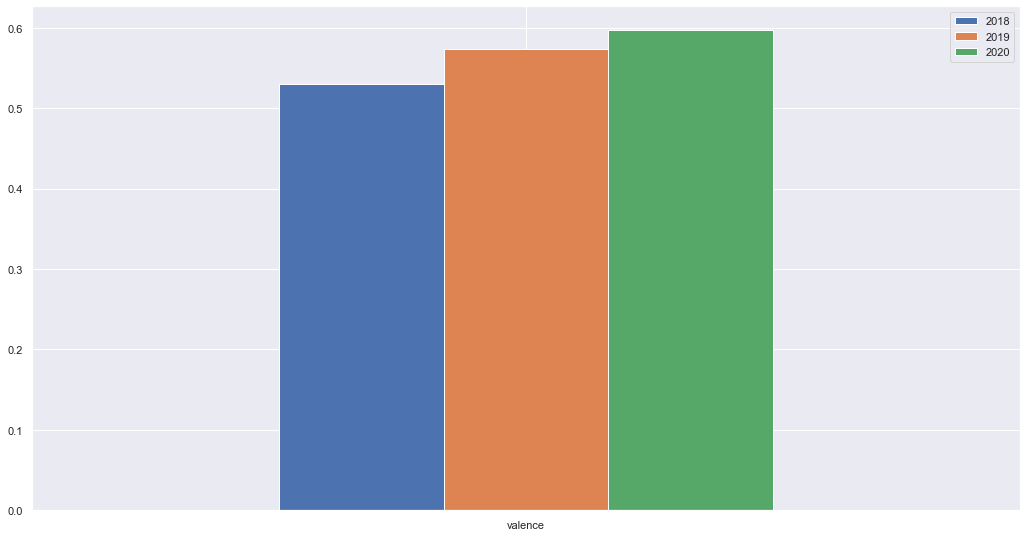

In [135]:
# Lo mismo que anterior pero quitando duplicados por artista, es decir para que no se repitan muchos unos mismos artistas por canciones
data_glo2 = data_glo.drop_duplicates(subset=['Track Name'])
print(data_glo.shape)
print(data_glo2.shape)

data_glo2_2020 = data_glo2[data_glo2['year'] == 2020]
data_glo2_2019 = data_glo2[data_glo2['year'] == 2019]
data_glo2_2018 = data_glo2[data_glo2['year'] == 2018]
data_glo2_2017 = data_glo2[data_glo2['year'] == 2017]

feature_list2 = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features2_2020 = data_glo2_2020[feature_list2]
features2_2019 = data_glo2_2019[feature_list2]
features2_2018 = data_glo2_2018[feature_list2]
features2_2017 = data_glo2_2018[feature_list2]

data_mean2_2020 = features2_2020['valence'].mean()
data_mean2_2019 = features2_2019['valence'].mean()
data_mean2_2018 = features2_2018['valence'].mean()
data_mean2_2017 = features2_2018['valence'].mean()
index = ['valence']

df = pd.DataFrame({'2018': data_mean2_2018, '2018': data_mean2_2018, '2019': data_mean2_2019, '2020': data_mean2_2020}, index=index)
ax = df.plot.bar(rot=0)


In [ ]:
'''# Mi prueba que al final sale bien!!!!! Peeeeero, cómo hago para que en vez de uno, pase una lista de canciones?? SIN TOCAR
API_LIMIT = 50

number_of_tracks = 2000
artist = ['Earth, Wind & Fire']

search_runs = int(number_of_tracks / API_LIMIT)

search_list = []
for i in range(search_runs):
    print("Call #{} for tracks".format(i+1))
    search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT, offset=API_LIMIT*i)

    search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']] for t in search_results['artists']['items']]

df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
df_search.head()
'''

''' OTRO SCRIPT
def _get_features_df(sp, track_ids):
    """
    This is an helper method to get track's features with pagination from track ids.
    It returns a Pandas dataframe
    """

    feature_list = []
    i = 0
    while track_ids:
        print("Call #{} for audio features".format(i + 1))
        features_results = sp.audio_features(track_ids[:API_LIMIT])

        feature_list += features_results
        
        track_ids = track_ids[API_LIMIT:]
        i += 1
    return feature_list

_get_features_df(sp, '7k4t7uLgtOxPwTpFmtJNTY')
'''

''' OTRO SCRIPT #PAra obtener los artists id
def _get_artists_df(sp, artist_ids):
    """
    This is an helper method to get artist's information with pagination from artist ids.
    It returns a Pandas dataframe
    """

    artist_list = []
    i = 0

    while artist_ids:
        print("Call #{} for artists".format(i + 1))
        artists_results = sp.artists(artist_ids[:API_LIMIT])

        artist_list += [[t["id"], t["genres"], t["popularity"]] for t in artists_results["artists"]]

        artist_ids = artist_ids[API_LIMIT:]
        i += 1

    df_artists = pd.DataFrame(artist_list, columns=["artist_id", "artist_genres", "artist_popularity"])

    df_artists["artist_popularity_norm"] = df_artists["artist_popularity"] / 100.

    return df_artists

# https://github.com/jvichare/rshiny-music-visualization/blob/master/Spotify%20Song%20Query.ipynb

'''

'''# Este script coge los artistas con un determinado genre, EL ORGINAL
API_LIMIT = 50

number_of_tracks = 2000
genre = 'jazz'

search_runs = int(number_of_tracks / API_LIMIT)

search_list = []
for i in range(search_runs):
    print("Call #{} for tracks".format(i+1))
    search_results = sp.search('genre:"{}"'.format(genre), type="track",  limit=API_LIMIT, offset=API_LIMIT*i)

    search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"],
                            t["album"]["name"], t["popularity"]]
                           for t in search_results['tracks']['items']]

df_search = pd.DataFrame(search_list, 
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"])
df_search["popularity_norm"] = df_search["popularity"] / 100.
df_search.head()
'''

'# Este script coge los artistas con un determinado genre, EL ORGINAL\nAPI_LIMIT = 50\n\nnumber_of_tracks = 2000\ngenre = \'jazz\'\n\nsearch_runs = int(number_of_tracks / API_LIMIT)\n\nsearch_list = []\nfor i in range(search_runs):\n    print("Call #{} for tracks".format(i+1))\n    search_results = sp.search(\'genre:"{}"\'.format(genre), type="track",  limit=API_LIMIT, offset=API_LIMIT*i)\n\n    search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"],\n                            t["album"]["name"], t["popularity"]]\n                           for t in search_results[\'tracks\'][\'items\']]\n\ndf_search = pd.DataFrame(search_list, \n                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"])\ndf_search["popularity_norm"] = df_search["popularity"] / 100.\ndf_search.head()\n'